In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [236]:
df = pd.read_csv("umkreisdata.csv")
df = df[["name", "percentage", "population"]]
df.sort_values("percentage", inplace=True, ascending = False)
df["population"] = df["population"] / 100

df["name"] = df["name"].apply(lambda x: " ".join(x.split("_")[1:3]))
df.reset_index(inplace=True, drop = True)

df.head()

,name,percentage,population
0,Illinois Urbana,93.292285,1989.034375
1,Hawaii Honolulu,81.981274,14471.306250
2,Wisconsin Madison,75.948103,4686.725000
3,Minnesota Duluth,75.663264,1422.086250
4,Illinois Springfield,69.400259,1494.446875


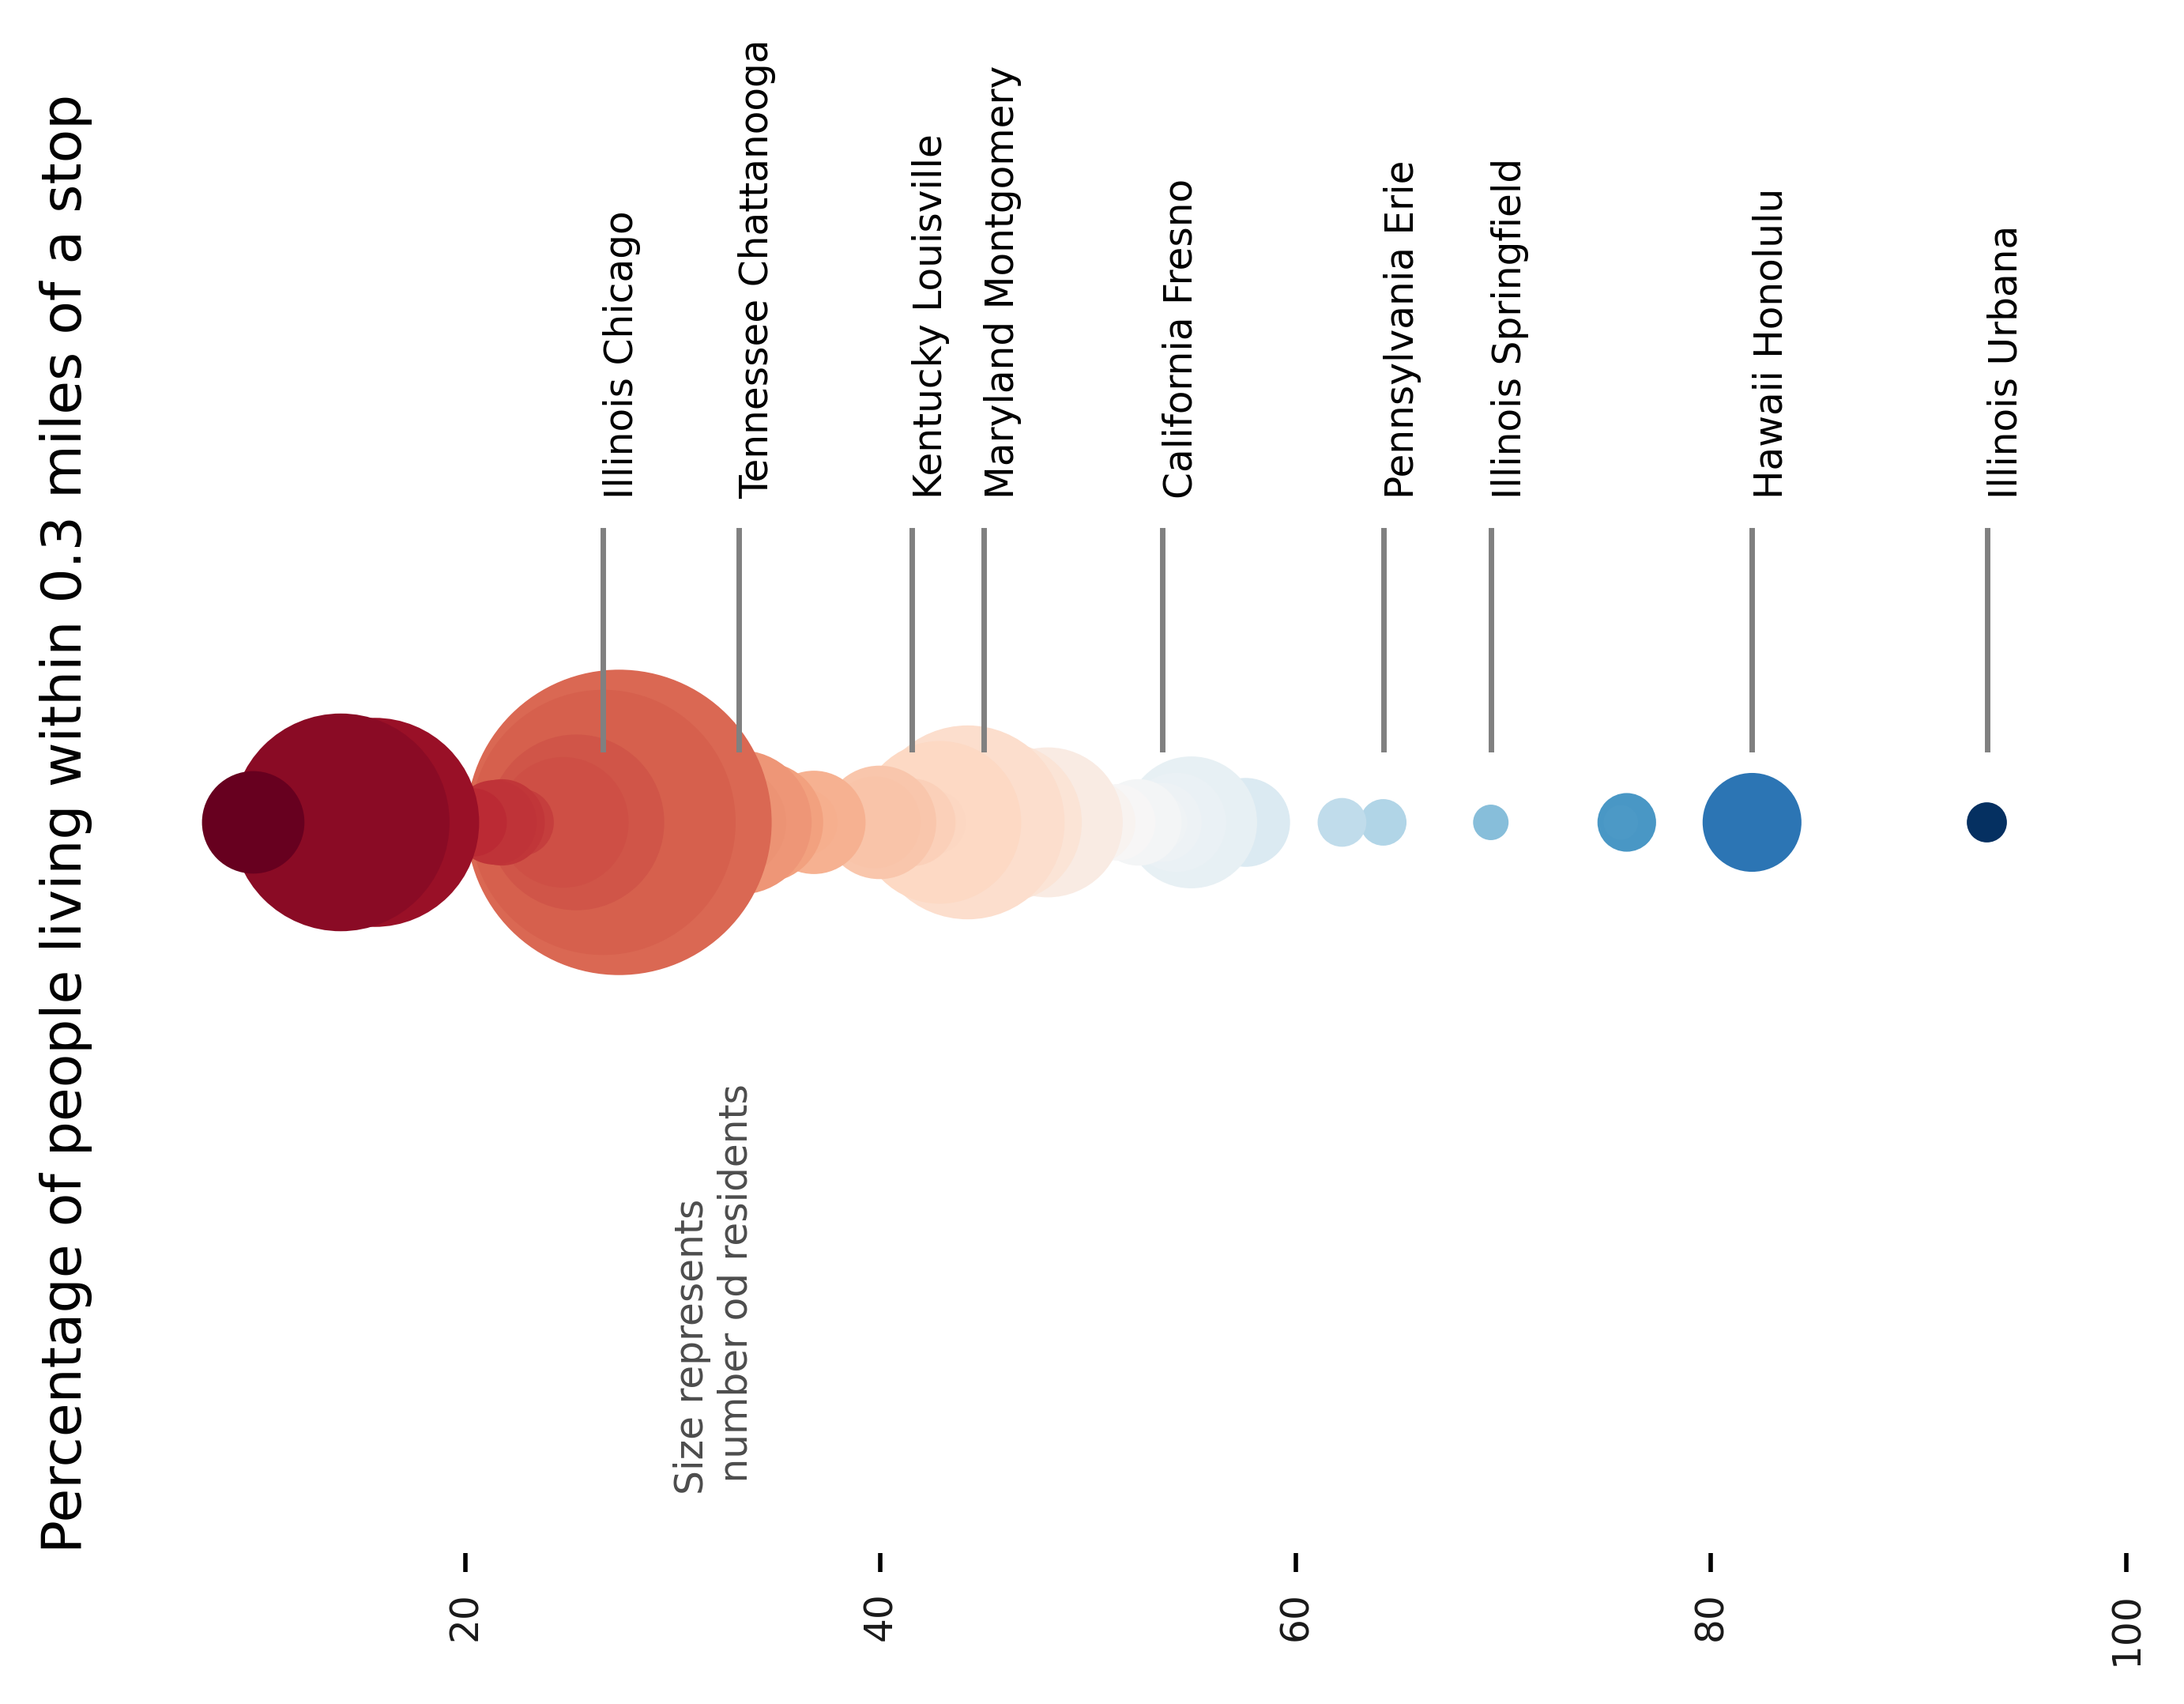

In [228]:

plt.scatter(x = df["percentage"], y = [0 for i in range(len(df))], s  = df["population"], c = df["percentage"], cmap = "RdBu")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks([])

plt.rcParams["figure.dpi"] = 500

notable_numms = [0, 1, 4, 5,10, 20, 30, 40, 50]

for i, val in enumerate(df.percentage):

    radius = df["population"].to_list()[i]
    city = df["name"].to_list()[i]


    if i in notable_numms:
        plt.axvline(x = val, linewidth = 1, color = "gray", ymin=0.55, ymax = 0.7)
        plt.text(val, 0.025,city,  rotation = 90, fontsize = 7)

plt.ylabel("Percentage of people living within 0.3 miles of a stop", fontsize = 10, labelpad = 10)
#plt.xlabel("Percentage of population", labelpad = 10)
plt.xticks(rotation=90, fontsize = 7, alpha = 0.9)

plt.text(s = "Size represents \n number od residents", rotation = 90, alpha = 0.7, x = 30, y = -0.05, fontsize = 7)

plt.xticks([i for i in range(20, 101, 20)])

plt.savefig('dotplot.png', dpi=300)